# Data Exploration Projet: Vorhersage von Diabetes

Bevor das Projekt ausgeführt werden muss, muss eine virtuelle Umgebung erstellt und aktiviert werden.


1. Um eine virtuelle Umgebung zu erstellen, kann folgender Befehl in Terminal ausgeführt werden:

```bash
python3 -m venv .venv_dep
```

2. Daher wird ein neuer Ordner in dem Verzeichnis automatisch erstellt.

3. Als Nächstes muss die Umgebung mit folgendem Befehl aktiviert werden:

```bash
source .venv_dep/bin/activate
```

oder in VSCode muss man manuell die Kernel auf oben rechte Seite festlegen.

4. Jetzt ist alles vorbereitet.

In [48]:
# Install Dependencies

%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install mlflow
%pip install seaborn
%pip install mlxtend
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [49]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


%matplotlib inline

# **Auswahl Datensatz**

In [50]:
#Import Dataset
dataset = "https://raw.githubusercontent.com/rakaputra12/Data_Exploration_Diabetes/main/Healthcare-Diabetes.csv"
diabetes_df = pd.read_csv(dataset)

Der Datensatz ist in dem GitHub-Repository abgelegt, was bedeutet, dass er von überall aus einfach zugänglich ist. Dazu wird auch der Datensatz in dem Ordner dazu gegeben, aber muss die Pfad angepasst werden.

In [51]:
diabetes_df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [52]:
#Delete the column "Id"
diabetes_df = diabetes_df.drop('Id', axis=1)

# **Charakterisierung des Datensatzes**

In [53]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [55]:
diabetes_df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2768.000000               2768.000000  2768.000000  2768.000000  
mean     32.137392                  0.471193    33.132225     0.343931  
std       8.076127                  0.325669    11.777230     0.475104  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.300000                  0.244000    24.000000     0.000000  
50%      32.200000                  0.375000    29.000000     0.000000  
75%      36.625000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [56]:
diabetes_df.describe().T

count        mean         std     min     25%  \
Pregnancies               2768.0    3.742775    3.323801   0.000   1.000   
Glucose                   2768.0  121.102601   32.036508   0.000  99.000   
BloodPressure             2768.0   69.134393   19.231438   0.000  62.000   
SkinThickness             2768.0   20.824422   16.059596   0.000   0.000   
Insulin                   2768.0   80.127890  112.301933   0.000   0.000   
BMI                       2768.0   32.137392    8.076127   0.000  27.300   
DiabetesPedigreeFunction  2768.0    0.471193    0.325669   0.078   0.244   
Age                       2768.0   33.132225   11.777230  21.000  24.000   
Outcome                   2768.0    0.343931    0.475104   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000  110.00  
Insulin                    37.000  130.000  846.00  
BMI                        32.200   36.625   80.60  
DiabetesPedigreeFunction    0.375    0.624    2.42  
Age                        29.000   40.000   81.00  
Outcome                     0.000    1.000    1.00

In [57]:
diabetes_df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0           False    False          False          False    False  False   
1           False    False          False          False    False  False   
2           False    False          False          False    False  False   
3           False    False          False          False    False  False   
4           False    False          False          False    False  False   
...           ...      ...            ...            ...      ...    ...   
2763        False    False          False          False    False  False   
2764        False    False          False          False    False  False   
2765        False    False          False          False    False  False   
2766        False    False          False          False    False  False   
2767        False    False          False          False    False  False   

      DiabetesPedigreeFunction    Age  Outcome  
0                        False  False    False  
1                        False  False    False  
2                        False  False    False  
3                        False  False    False  
4                        False  False    False  
...                        ...    ...      ...  
2763                     False  False    False  
2764                     False  False    False  
2765                     False  False    False  
2766                     False  False    False  
2767                     False  False    False  

[2768 rows x 9 columns]

In [58]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Im Rohdatensatz, bevor eine Bereinigung durchgeführt wird, ist es nicht ungewöhnlich, fehlende Werte zu finden.Daher ist es in dem Fall wichtig, eine gründliche Untersuchung der fehlenden Werte durchzuführen, um ihr Ausmaß und ihre Verteilung zu verstehen. 

In [59]:
zero_counts = (diabetes_df == 0).sum()
zero_counts

Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64

After further checking, it was found that in certain columns, the zero values did not make sense, indicating missing values.

Following columns or variables have an invalid zero value: Glucose, BloodPressure, SkinThickness, Insulin, BMI. There are many approachs to handling missing values in a dataset. Replacing zero values with NaN and then filling them with the distribution for each column is one of many common possibilities.

Replacing zero values with NaN and then filling them with the distribution for each column is a reasonable approach to handling missing data in this case, cause Reducing the potential bias introduced by using a single imputation method for all missing values leads to more accurate and robust analyses, particularly in datasets where different columns have distinct distributions.This technique allows you to preserve the integrity of the data and capture the uncertainty associated with missing values. On the column like Pregnancies, a value of zero does make sense, cause someone can have never been pregnant. For the column "Outcome" is because the value for sufferer or not is only differentiated by one or zero.

Bei einer weiteren Überprüfung wurde festgestellt, dass in bestimmten Spalten die Nullwerte keinen Sinn ergaben, was auf fehlende Werte hindeutet.
Die folgenden Spalten oder Variablen haben einen ungültigen Nullwert: Glukose, Blutdruck, Hautdicke, Insulin, BMI. Es gibt viele Ansätze für die Behandlung fehlender Werte in einem Datensatz. Das Ersetzen von Nullwerten durch NaN und das anschließende Auffüllen mit der Verteilung für jede Spalte ist eine von vielen gängigen Möglichkeiten.
Das Ersetzen von Nullwerten durch NaN und das anschließende Auffüllen mit der Verteilung für jede Spalte ist in diesem Fall ein vernünftiger Ansatz für den Umgang mit fehlenden Daten, denn die Verringerung der potenziellen Verzerrung durch die Verwendung einer einzigen Imputationsmethode für alle fehlenden Werte führt zu genaueren und robusteren Analysen, insbesondere in Datensätzen, in denen verschiedene Spalten unterschiedliche Verteilungen aufweisen. In der Spalte "Schwangerschaften" macht ein Wert von Null durchaus Sinn, da jemand nie schwanger gewesen sein kann. Bei der Spalte "Ergebnis" wird der Wert für "erkrankt" oder "nicht erkrankt" nur durch eins oder null unterschieden.

In [60]:
#Replace zeros with NaN Value
filtered_diabetes_df = diabetes_df.copy(deep = True)
filtered_diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = filtered_diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

#Showing the Count of NaNs
print(filtered_diabetes_df.isnull().sum())

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [61]:
#Aiming to impute NaN values for the columns in accordance with their distribution
filtered_diabetes_df['Glucose'].fillna(filtered_diabetes_df['Glucose'].mean(), inplace=True)
filtered_diabetes_df['BloodPressure'].fillna(filtered_diabetes_df['BloodPressure'].mean(), inplace=True)
filtered_diabetes_df['SkinThickness'].fillna(filtered_diabetes_df['SkinThickness'].mean(), inplace=True)
filtered_diabetes_df['Insulin'].fillna(filtered_diabetes_df['Insulin'].mean(), inplace=True)
filtered_diabetes_df['BMI'].fillna(filtered_diabetes_df['BMI'].mean(), inplace=True)

/var/folders/4l/lbf6f7cx7pd9qfs2p1px1_x00000gn/T/ipykernel_17098/2787525002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_diabetes_df['Glucose'].fillna(filtered_diabetes_df['Glucose'].mean(), inplace=True)
/var/folders/4l/lbf6f7cx7pd9qfs2p1px1_x00000gn/T/ipykernel_17098/2787525002.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [62]:
#Showing the Count of NaNs
print(filtered_diabetes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Nun ist der Datensatz bereit zu verarbeiten.

## **Perform EDA (Exploratory Data Analysis )**

Outcome
0    1816
1     952
Name: count, dtype: int64


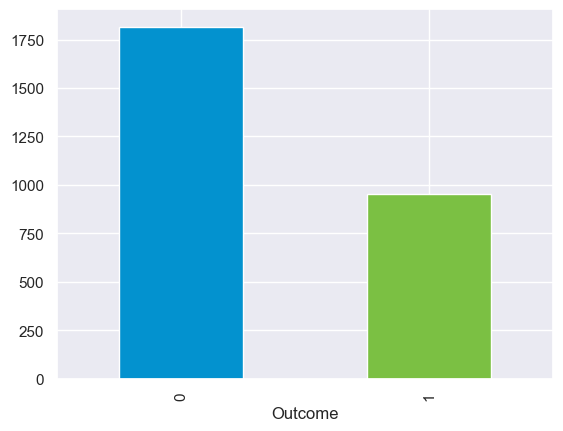

In [63]:
#Checking the balance of the data by plotting the count of outcomes by their values
colors = ['#0392cf', '#7bc043']

print(filtered_diabetes_df.Outcome.value_counts())
p = filtered_diabetes_df.Outcome.value_counts().plot(kind="bar", color = colors)

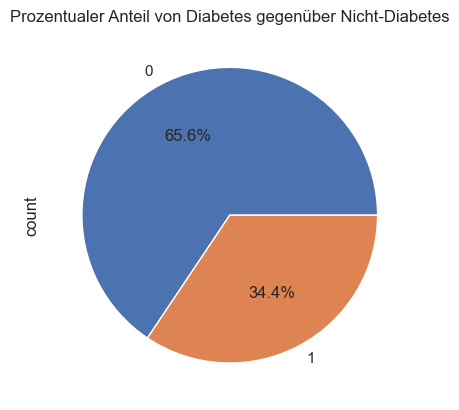

In [64]:
# Plotting a pie chart to visualize the percentage distribution of diabetes and non-diabetes outcomes
filtered_diabetes_df['Outcome'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Prozentualer Anteil von Diabetes gegenüber Nicht-Diabetes')
plt.show()

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients.

Das obige Diagramm zeigt, dass die Daten leicht in Richtung der Datenpunkte mit einem Rückgabewert von 0 verzerrt sind. Die Zahl der Nicht-Diabetiker ist fast doppelt so hoch wie die Zahl der Diabetiker.

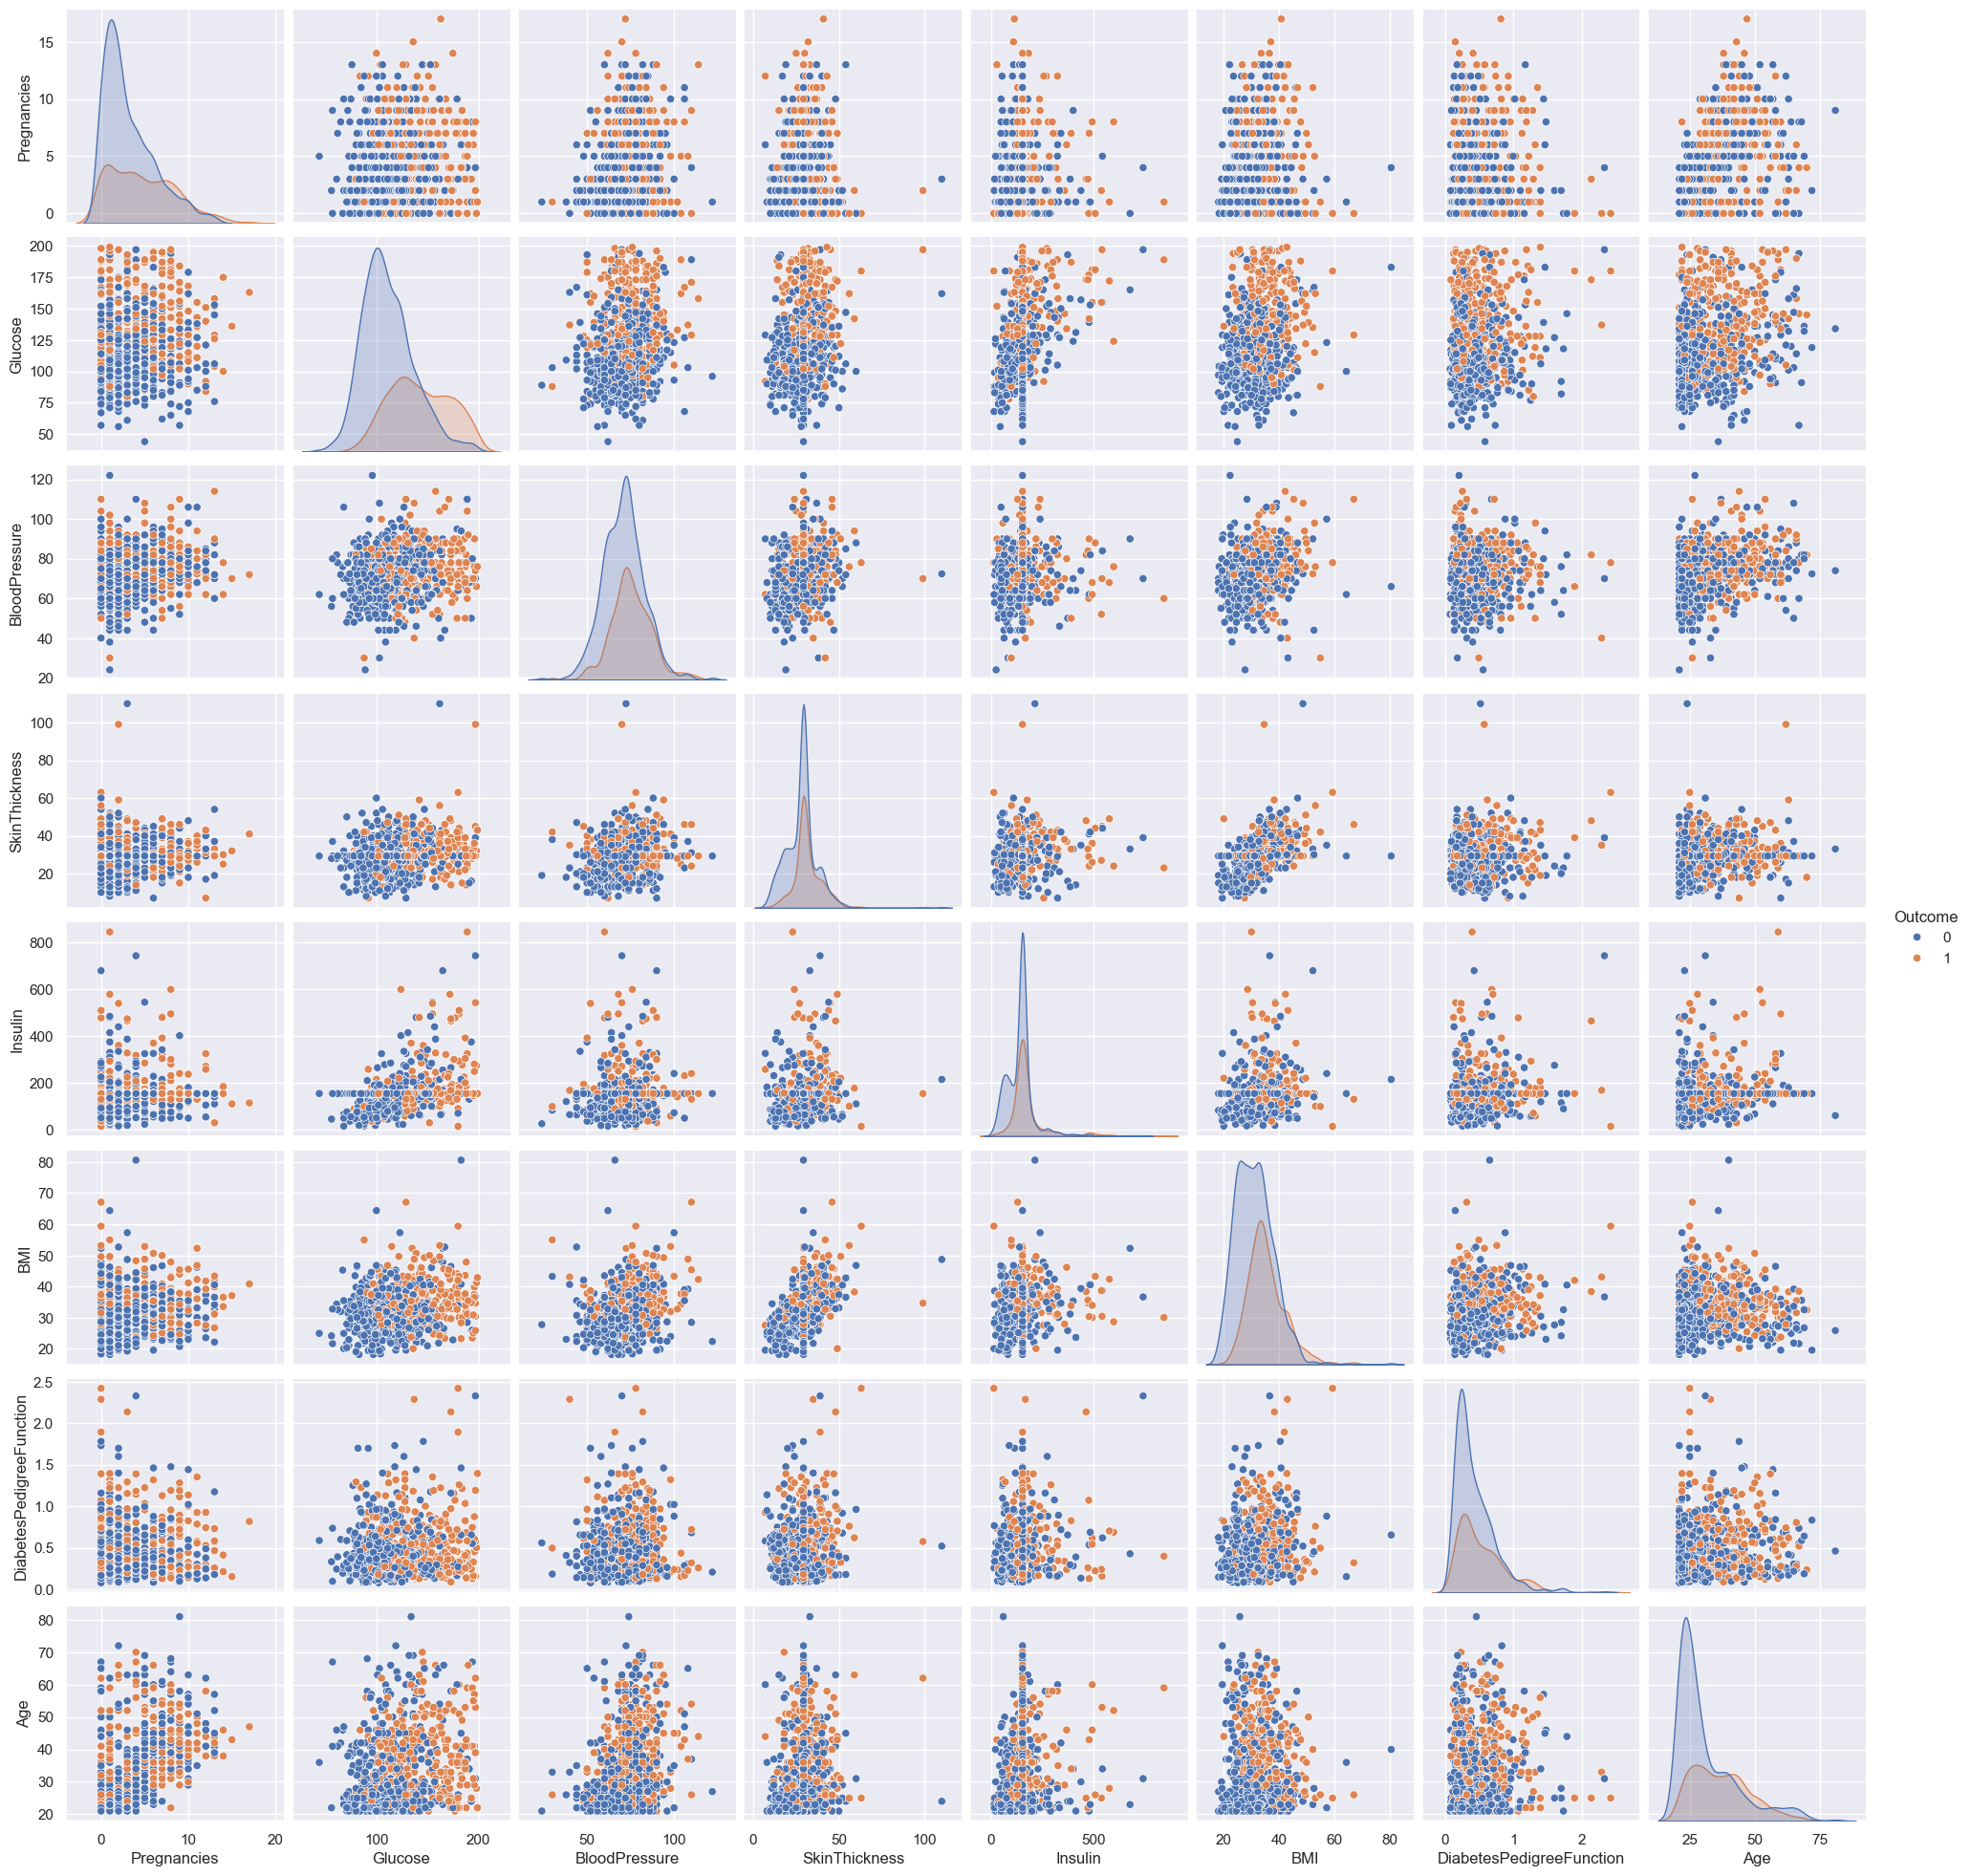

In [65]:
#Plotting the Pair Plots for the cleaned data
p = sns.pairplot(filtered_diabetes_df, hue= 'Outcome')

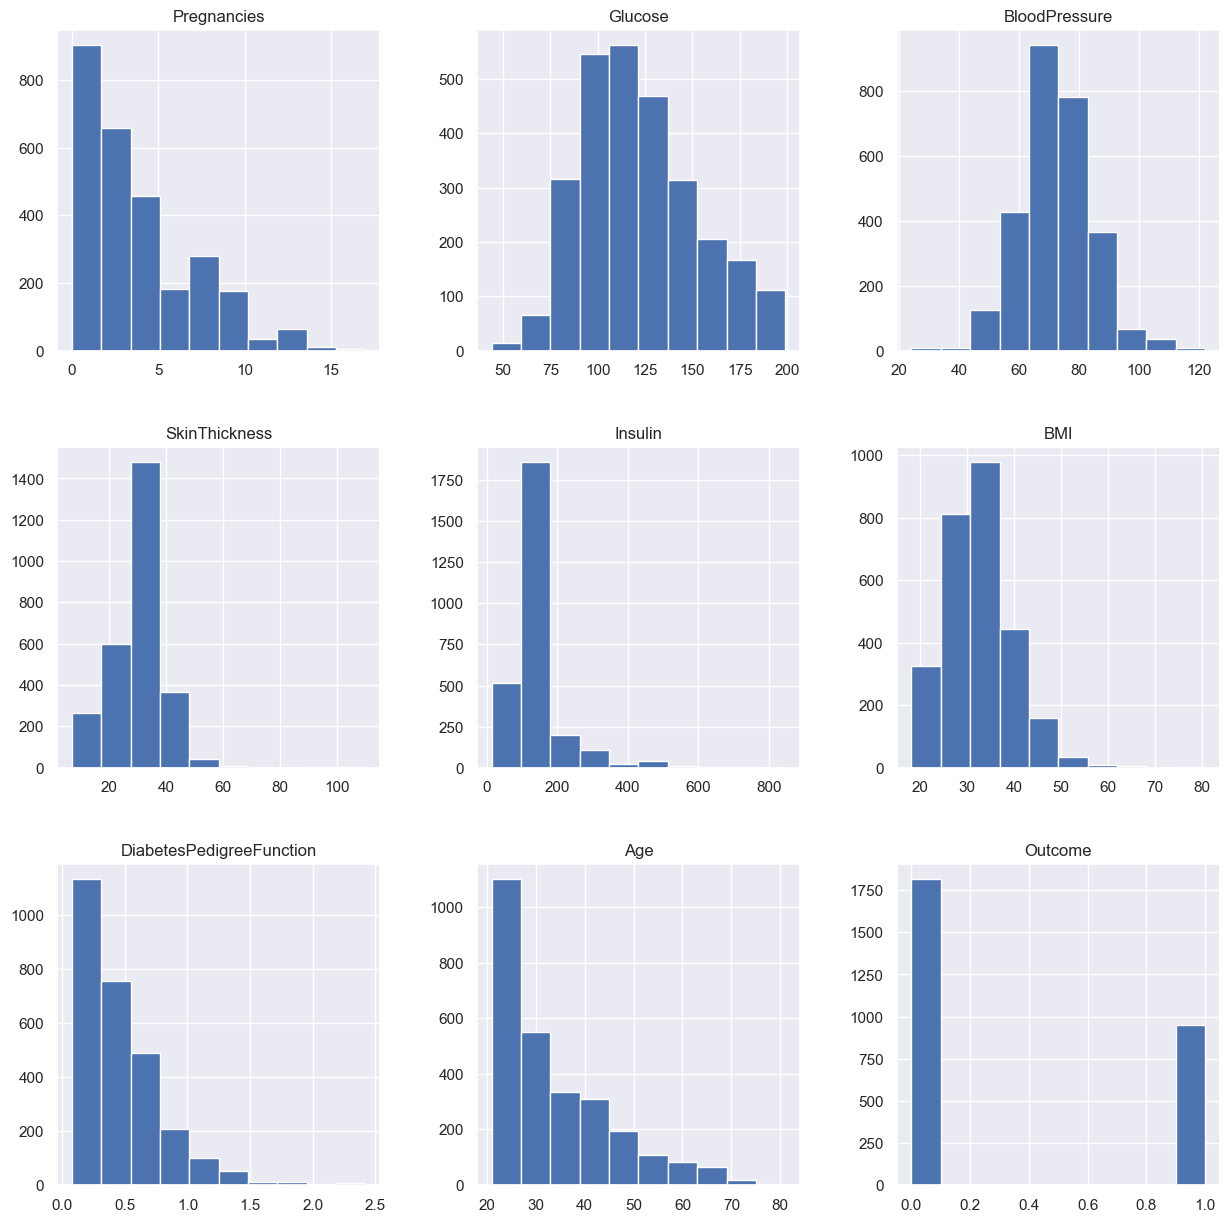

In [66]:
#Plotting the distribution after replacing the NaN Values
p = filtered_diabetes_df.hist(figsize=(15,15))

## **Correlation between all the features**

In [67]:
# Calculate the correlation matrix 
filtered_diabetes_df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.123213       0.200860       0.086211   
Glucose                      0.123213  1.000000       0.204630       0.204168   
BloodPressure                0.200860  0.204630       1.000000       0.200212   
SkinThickness                0.086211  0.204168       0.200212       1.000000   
Insulin                      0.054814  0.410280       0.073038       0.173250   
BMI                          0.013862  0.232194       0.265114       0.524172   
DiabetesPedigreeFunction    -0.027731  0.127760       0.007852       0.094273   
Age                          0.540805  0.261631       0.323675       0.131754   
Outcome                      0.223796  0.489335       0.172116       0.208093   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.054814  0.013862                 -0.027731   
Glucose                   0.410280  0.232194                  0.127760   
BloodPressure             0.073038  0.265114                  0.007852   
SkinThickness             0.173250  0.524172                  0.094273   
Insulin                   1.000000  0.181275                  0.096865   
BMI                       0.181275  1.000000                  0.145022   
DiabetesPedigreeFunction  0.096865  0.145022                  1.000000   
Age                       0.103331  0.020287                  0.028544   
Outcome                   0.209610  0.290028                  0.160664   

                               Age   Outcome  
Pregnancies               0.540805  0.223796  
Glucose                   0.261631  0.489335  
BloodPressure             0.323675  0.172116  
SkinThickness             0.131754  0.208093  
Insulin                   0.103331  0.209610  
BMI                       0.020287  0.290028  
DiabetesPedigreeFunction  0.028544  0.160664  
Age                       1.000000  0.237050  
Outcome                   0.237050  1.000000

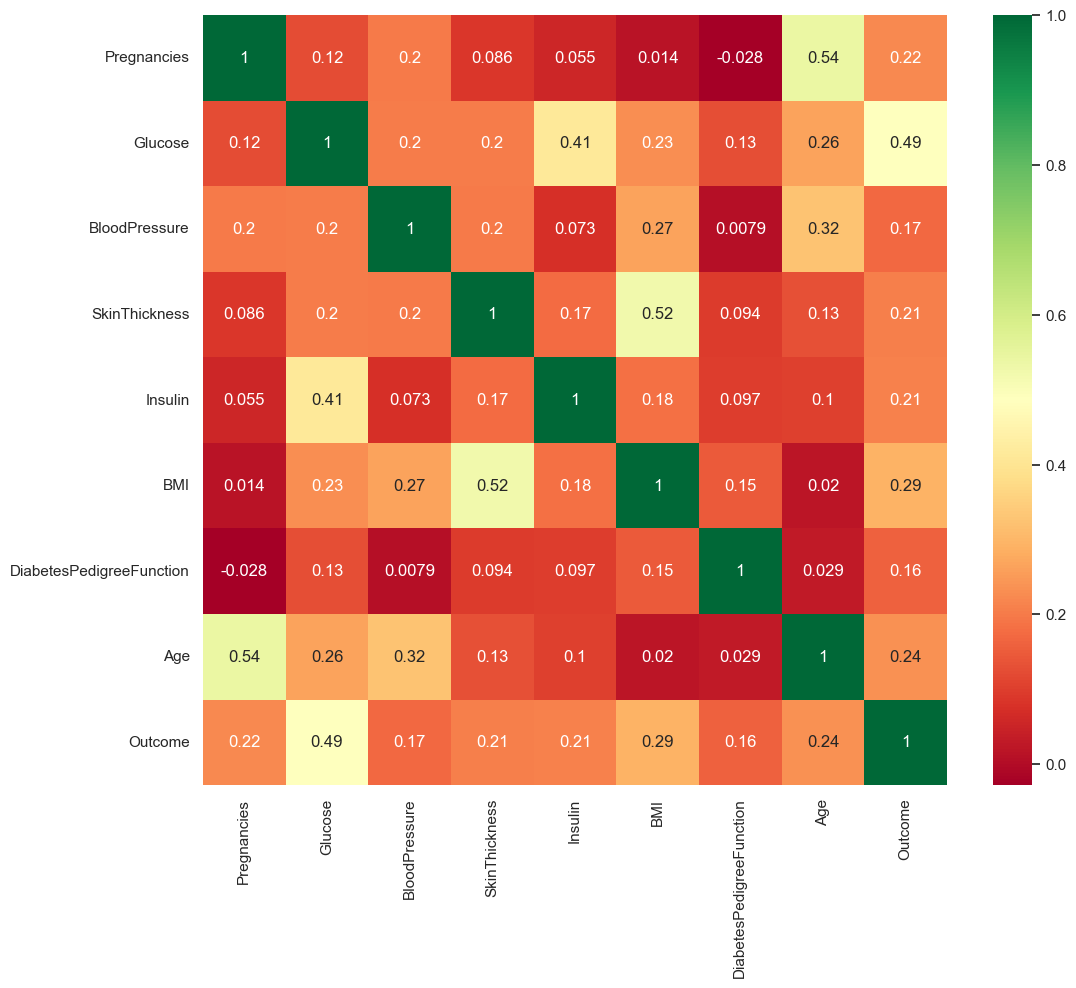

In [68]:
#Correlation between all the features after cleaning
plt.figure(figsize= (12,10))
p = sns.heatmap(filtered_diabetes_df.corr(), annot = True, cmap = 'RdYlGn')

# **Feature Engineering**

In [69]:
#Import Libraries for Feature Enginnering
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [70]:
# Extracting features (X) and target variable (y) from the DataFrames
X=filtered_diabetes_df[filtered_diabetes_df.columns[0:-1]]
y=filtered_diabetes_df[filtered_diabetes_df.columns[-1]]

### **Split the dataset for Feature Importance**

In [71]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

## **Ermittlung der Feature Importance mit einem Decision Tree**

In [72]:
# Instantiate a DecisionTreeClassifier with specified parameters
tree = DecisionTreeClassifier(max_depth=4,random_state=0)

# Train the Decision Tree classifier on the training data
tree.fit(X_train,y_train)

# Print the accuracy on the test set and the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.764


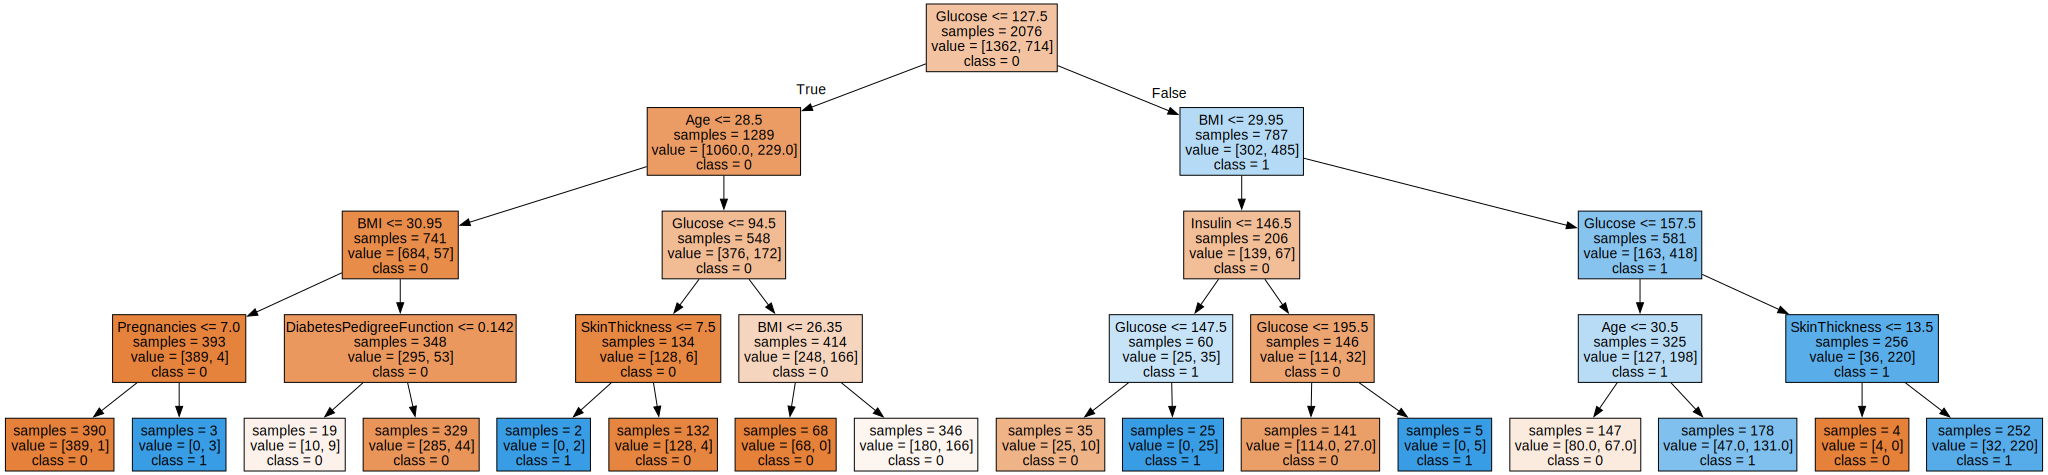

In [73]:
from sklearn.tree import export_graphviz

# Export the decision tree visualization to a .dot file
export_graphviz(tree,
                out_file="diabetes_tree.dot",
                class_names=["0","1"],
                feature_names=X.columns,
                impurity=False,
                filled=True)

import graphviz

# Read the .dot file and visualize the decision tree
with open("diabetes_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [74]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.0143511  0.61247795 0.         0.02351696 0.02732323 0.19595432
 0.01005799 0.11631844]


In [75]:
# Create a DataFrame to display feature importances
df_feature_importance = pd.DataFrame({'Feature Names': X.columns, 'Importance of  Feature': tree.feature_importances_ })
df_feature_importance

Feature Names  Importance of  Feature
0               Pregnancies                0.014351
1                   Glucose                0.612478
2             BloodPressure                0.000000
3             SkinThickness                0.023517
4                   Insulin                0.027323
5                       BMI                0.195954
6  DiabetesPedigreeFunction                0.010058
7                       Age                0.116318

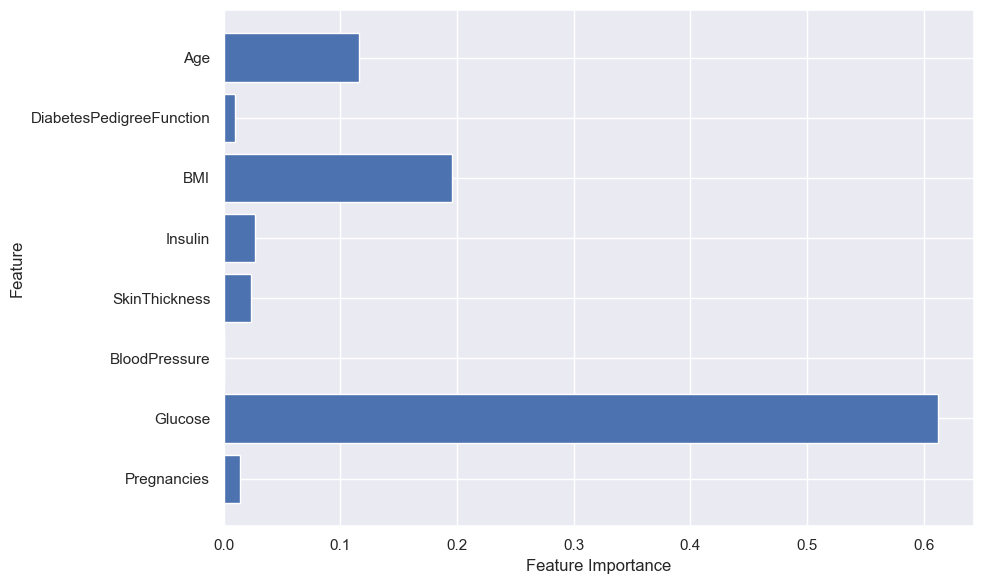

In [76]:
# Plot feature importances using the provided decision tree model
def plot_feature_importances_with_DecisionTree(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10, 6))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.savefig("feature_importance_with_DecisionTree.png", dpi=300)
    plt.show()
    plt.close()
plot_feature_importances_with_DecisionTree(tree)

Hier kann man erkennen, dass Feature "Glucose", "BMI" and "Age" Parameter sind, auf die geachtet werden müssen.

## **Ermittlung der Feature Importance mit einem Random  (Als Vergleich)**

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Define feature names
feature_names = [f"feature {i}" for i in range(X.shape[1])]

# Instantiate a RandomForestClassifier with specified parameters
forest = RandomForestClassifier(n_estimators=100,random_state=0)

# Train the Random Forest classifier on the training data
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [78]:
print(forest.feature_importances_)

[0.07927711 0.26353125 0.08524901 0.07643024 0.08459649 0.16050029
 0.11810156 0.13231405]


In [79]:
# Create a DataFrame to display feature importances
df_feature_importance_withRandomForest = pd.DataFrame({'Feature Names': X.columns, 'Importance of  Feature': forest.feature_importances_ })
df_feature_importance_withRandomForest

Feature Names  Importance of  Feature
0               Pregnancies                0.079277
1                   Glucose                0.263531
2             BloodPressure                0.085249
3             SkinThickness                0.076430
4                   Insulin                0.084596
5                       BMI                0.160500
6  DiabetesPedigreeFunction                0.118102
7                       Age                0.132314

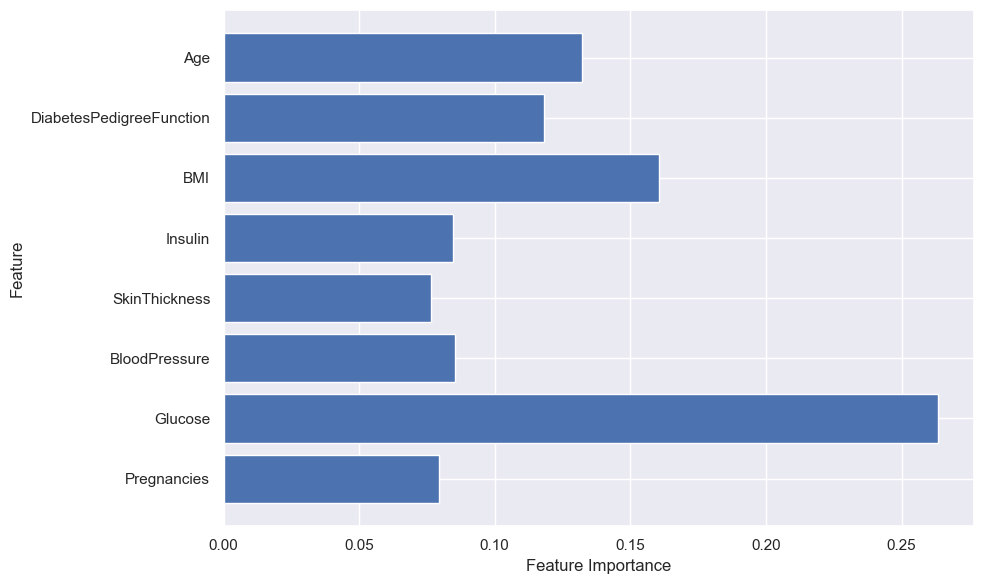

In [80]:
def plot_feature_importances_with_RandomForest(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10, 6))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.savefig("feature_imporatnace_with_RandomForest.png", dpi=300)
    plt.show()
    plt.close()
plot_feature_importances_with_RandomForest(forest)

Nach einem Vergleich mit dem RandomForest-Algorithmus wurde bestätigt, dass die Merkmale "Glucose", "BMI" und "Age" als die wichtigsten Merkmale identifiziert wurden. Dies deutet darauf hin, dass diese spezifischen Merkmale einen signifikanten Einfluss auf das Modell haben und einen wesentlichen Beitrag zur Vorhersageleistung leisten. 

# **Auswahl der Metriken**

Für den Datensatz "Diabetes" wurde dazu entschieden, den F1-Score als Evaluationsmetrik zu verwenden. Der F1-Score ist eine Metrik, die das Gleichgewicht zwischen Präzision und Rückruf (Recall) misst. Es ist besonders nützlich, wenn die Klassen im Datensatz nicht gleichmäßig verteilt sind oder wenn False Positives und False Negatives ähnlich schwerwiegend sind. Im Falle des Diabetes-Datensatzes, bei dem es um die korrekte Vorhersage von Diabetesfällen geht, kann der F1-Score hilfreich sein, um sicherzustellen, dass sowohl die Präzision als auch der Rückruf bei der Vorhersage von positiven Fällen berücksichtigt werden.

Es gibt verschiedene Überlegungen und Prioritäten für jede Metrik.

- Wenn falsch-positive Vorhersagen kostspielig sind: Wählen Sie Präzision. Die Präzision misst den Anteil der richtig positiven Vorhersagen an allen positiven Vorhersagen. Wenn falsch positive Vorhersagen in Ihrem Szenario kostspielig sind (z. B. unnötige Behandlungen oder Eingriffe bei Personen, die nicht an Diabetes leiden), sollten Sie der Präzision den Vorrang geben.

- Wenn falsch-negative Vorhersagen kostspielig sind: Wählen Sie Recall. Recall misst den Anteil wahrer positiver Vorhersagen an allen tatsächlich positiven Instanzen. Wenn das Auslassen positiver Fälle (falsch-negative Vorhersagen) in Ihrem Kontext kritischer ist (z. B. wenn Personen, die tatsächlich Diabetes haben, nicht diagnostiziert werden), sollten Sie der Rückrufquote den Vorzug geben.

- Wenn Sie ein Gleichgewicht brauchen: Wählen Sie den F1-Score. Der F1-Score ist der harmonische Mittelwert aus Präzision und Recall und bietet ein ausgewogenes Maß für beide. Er ist nützlich, wenn Sie den Kompromiss zwischen falsch-positiven und falsch-negativen Ergebnissen abwägen möchten.

# **Auswahl und Beschreibung der ML-Methode**

Dazu kommt die Methode "Supervised Learning" zum Einsatz. Dafür wurde auch der Support Vector Machine (SVM) Algorithmus in Betracht gezogen. 

Die Support Vector Machine ist ein leistungsstarker Algorithmus für die Klassifizierung und Regression, der besonders effektiv in der Verarbeitung komplexer Daten und in Szenarien mit hoher Dimensionalität ist. Dies macht sie zu einer attraktiven Wahl für den Diabetes-Datensatz, der oft Merkmale mit hoher Dimensionalität aufweist und möglicherweise nicht-linear trennbar ist.

Ein weiterer Vorteil der SVM ist ihre Fähigkeit, gut mit kleineren Trainingsdatensätzen umzugehen, ohne an Leistung zu verlieren. Dies ist besonders relevant in Situationen, in denen der Diabetes-Datensatz begrenzte Datenpunkte aufweisen könnte.

Darüber hinaus bietet die SVM die Möglichkeit, verschiedene Kernel-Funktionen zu verwenden, um die Entscheidungsgrenze zwischen den Klassen anzupassen. Dies ermöglicht es, auch in komplexen, nicht-linearen Datenstrukturen effektive Trennungen zu finden.

## **Preparation Data**

Bevor das Modell mit Diabetes Datensatz trainiert wird, muss der Datensatz noch ein bisschen vorbereitet werden. Datenpräparation hilft dabei, sicherzustellen, dass die Eingabedaten in der Produktionsumgebung, in der das Modell eingesetzt wird, in der richtigen Form vorliegen und dass das Modell effizient und effektiv arbeiten kann.

Es ist auch wichtig zu merken, dass in dem Fall  alle Features für die Training genommen werden, weil zwei Features sehr zu wenig für die Modelling sind.

In [98]:
# Separating features (X) and target variable (y) from the DataFrame
X = filtered_diabetes_df.drop("Outcome", axis=1)
y = filtered_diabetes_df['Outcome']

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Transform the features using StandardScaler and create a DataFrame with scaled features
X = pd.DataFrame(scaler.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.679232  0.856020      -0.033713   6.324028e-01  0.000000  0.141272   
1    -0.825341 -1.209862      -0.534293  -3.207596e-02  0.000000 -0.844346   
2     1.281062  2.003733      -0.701153   3.934505e-16  0.000000 -1.308995   
3    -0.825341 -1.078694      -0.534293  -6.965547e-01 -0.737636 -0.633142   
4    -1.126256  0.495311      -2.703474   6.324028e-01  0.168523  1.478897   

   DiabetesPedigreeFunction       Age  
0                  0.478509  1.432495  
1                 -0.369130 -0.181079  
2                  0.616712 -0.096154  
3                 -0.934224 -1.030329  
4                  5.579704 -0.011229

## **Split Dataset**

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MUSS ANGEPASST WERDEN, WEIL DIESER SATZ NUR BEI DEP_FIX GILT!!!!!!

Nach viele Proben führt die Einstellung der Splitgröße auf 0,2 zu einer besseren Modellleistung als die Einstellung auf 0,3. 

# **Implementierung Training**

In [115]:
from sklearn.metrics import classification_report, accuracy_score

In [116]:
from sklearn import svm

# Instantiate SVM classifier
machine = svm.SVC()

# Train the SVM classifier on the training data
machine.fit(X_train,y_train)

# Predict using the trained SVM classifier
y_pred = machine.predict(X_test)

# Calculate accuracy
clf_acc = accuracy_score(y_pred, y_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy of SVM classifier
print("Accuracy SVM: {:.2f}%".format(clf_acc * 100))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       367
           1       0.82      0.66      0.73       187

    accuracy                           0.84       554
   macro avg       0.83      0.79      0.81       554
weighted avg       0.84      0.84      0.83       554

Accuracy SVM: 83.75%


# **Hyperparametertuning Verwendung ML Lifecycle Mgt im Code**

Hyperparameter-Tuning ist ein entscheidender Schritt im maschinellen Lernprozess, der darauf abzielt, die Leistung eines Modells weiter zu verbessern, indem die optimalen Werte für die Hyperparameter gefunden werden. Selbst wenn ein Modell bereits eine akzeptable Leistung erzielt hat, wie in dem Fall mit einer Genauigkeit von 73,75% von der ersten Implementierung, kann das Tuning der Hyperparameter dazu beitragen, die Leistung weiter zu steigern. 

In dem Fall kommt auch dazu ein ML Lifecylce Management "MlFlow" zum Einsatz. Ein ML Lifecycle Management wird verwendet, um Parameter, Metriken und Ausgabedateien zu protokollieren, wenn der maschinellen Lerncode sausgeführt wird, und um die Ergebnisse später zu visualisieren. 


In [ ]:
#Install Dependencies

%pip install mlflow
%pip install pyngrok

In [117]:
import mlflow
from sklearn.model_selection import GridSearchCV

In [118]:
# Start an MLflow run
mlflow.start_run()

<ActiveRun: >

In [119]:

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],  # Regularization parameter
    'kernel': ['linear', 'rbf','poly', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'coef0': [0.0, 0.1, 0.5],  # Independent term in kernel function
    'shrinking': [True, False],  # Whether to use the shrinking heuristic
    'probability': [True, False],  # Whether to enable probability estimates
    'tol': [0.0001, 0.001, 0.01],  # Tolerance for stopping criterion
}


# Create GridSearchCV
grid_search = GridSearchCV(estimator=machine, param_grid=param_grid, n_jobs=6, verbose=4, cv=5, scoring='accuracy', refit='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Log parameters and metrics to MLflow
mlflow.log_metric("best_score", grid_search.best_score_)
# Log the best parameters as a parameter
for key, value in grid_search.best_params_.items():
    mlflow.log_param(f"best_{key}", value)

# Log the trained model
mlflow.sklearn.log_model(grid_search.best_estimator_, "svm_model")


Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
[CV 1/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.001;, score=0.788 total time=   0.2s
[CV 5/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.753 total time=   0.2s
[CV 3/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.747 total time=   0.2s
[CV 4/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.752 total time=   0.2s
[CV 2/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.801 total time=   0.2s
[CV 1/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.788 total time=   0.2s
[CV 2/5] END C=0.1, coef0=0.0, degree=2, gamma=scale,

In [120]:
 # End the  MLflow run
mlflow.end_run()

In [121]:
# Launch the MLflow UI
!mlflow ui

[2024-04-09 16:48:25 +0200] [22154] [INFO] Starting gunicorn 21.2.0
[2024-04-09 16:48:25 +0200] [22154] [INFO] Listening at: http://127.0.0.1:5000 (22154)
[2024-04-09 16:48:25 +0200] [22154] [INFO] Using worker: sync
[2024-04-09 16:48:25 +0200] [22155] [INFO] Booting worker with pid: 22155
[2024-04-09 16:48:26 +0200] [22156] [INFO] Booting worker with pid: 22156
[2024-04-09 16:48:26 +0200] [22157] [INFO] Booting worker with pid: 22157
[2024-04-09 16:48:26 +0200] [22158] [INFO] Booting worker with pid: 22158
^C
[2024-04-09 16:48:37 +0200] [22154] [INFO] Handling signal: int
[2024-04-09 16:48:37 +0200] [22156] [INFO] Worker exiting (pid: 22156)
[2024-04-09 16:48:37 +0200] [22158] [INFO] Worker exiting (pid: 22158)
[2024-04-09 16:48:37 +0200] [22155] [INFO] Worker exiting (pid: 22155)
[2024-04-09 16:48:37 +0200] [22157] [INFO] Worker exiting (pid: 22157)


Um den nächsten Code auszuführen, muss MLFlow ui zuerst durch manuelles Drücken der Stopp-Taste gestoppt werden.

# **Evaluation und Ergebnisdarstellung** | **Predict and Evaluate**

In [122]:
# Use the best estimator to predict
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Evaluate the model
clf_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print("Accuracy SVM after GridSearchCV: {:.2f}%".format(clf_acc*100))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       367
           1       0.90      0.93      0.91       187

    accuracy                           0.94       554
   macro avg       0.93      0.94      0.93       554
weighted avg       0.94      0.94      0.94       554

Accuracy SVM after GridSearchCV: 94.04%


WENN SPLITTING 0.2

Nachdem das Hyperparameter-Tuning durchgeführt wurde, konnte die Genauigkeit des Modells von 83,75% auf 94,04% gesteigert werden. Diese signifikante Verbesserung der Genauigkeit zeigt, wie wichtig es ist, die Hyperparameter eines Modells sorgfältig anzupassen. Durch das Feintuning der Hyperparameter konnte das Modell besser auf die spezifischen Anforderungen des Datensatzes abgestimmt werden, was zu einer verbesserten Leistung bei der Klassifizierung von Diabetesfällen führt.

WENN SPLITTING 0.3

Nachdem das Hyperparameter-Tuning durchgeführt wurde, konnte die Genauigkeit des Modells von 84,00% auf 93,62% gesteigert werden.

# **Vorhersage-Demo | Testing**

Die Vorhersage-Demo mit dem Modell, das optimale Hyperparameter verwendet, bietet einen praxisnahen Einblick in die Leistungsfähigkeit des Modells. Benutzer können in der Demo neue Eingabedaten eingeben, und das Modell wird basierend auf diesen Daten Vorhersagen treffen. 

In [112]:
# Create a dictionary containing the new data
new_data = {
      'Pregnancies': [5],
      'Glucose': [200],
      'BloodPressure': [66],
      'SkinThickness': [29],
      'Insulin': [49],
      'BMI': [47.6],
      'DiabetesPedigreeFunction': [0.351],
      'Age': [27]

}

# Create a DataFrame from the dictionary
new_data = pd.DataFrame(new_data)
new_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      200             66             29       49  47.6   

   DiabetesPedigreeFunction  Age  
0                     0.351   27

In [113]:
# Scale the new data using the previously fitted StandardScaler
scaled_new_data = pd.DataFrame(scaler.transform(new_data), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                                                   'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Predict the outcome using the best estimator from GridSearchCV
y_pred_testing = best_estimator.predict(scaled_new_data)
print("New Diagnosis from New Data: ", y_pred_testing)

New Diagnosis from New Data:  [1]
